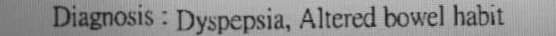

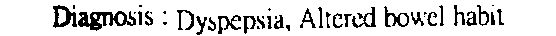

[[0 1 0]
 [1 1 1]
 [0 1 0]]


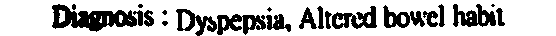

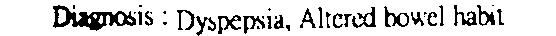

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# mport cv2.cv as cv
img = cv2.imread('./images/29.png')
GrayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(GrayImage))
ret, thresh1 = cv2.threshold(GrayImage, 110, 255, cv2.THRESH_BINARY)
display(Image.fromarray(thresh1))
# ret,thresh2=cv2.threshold(GrayImage,130,255,cv2.THRESH_BINARY_INV)
kernel = np.uint8(np.zeros((3, 3)))
kernel[1][1] = 1
kernel[0][1] = 1
kernel[1][0] = 1
kernel[1][2] = 1
kernel[2][1] = 1

# for x in range(3):
#     kernel[x, 2] = 1
#     kernel[2, x] = 1
print(kernel)
# 腐蚀图像
eroded = cv2.erode(thresh1, kernel)
display(Image.fromarray(eroded))

# display(Image.fromarray(255 - eroded))

# 膨胀图像
dilated = cv2.dilate(eroded, kernel)

display(Image.fromarray(dilated))


In [ ]:
from glob import glob
import pytesseract

paths = glob('./images/*_.png')

def process_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     display(img)
    
    arr = (img // 10)*10 
    counts = np.bincount(arr.flatten())
#     print(np.argmax(counts))
    
    display(Image.fromarray(img))
    
    # threshold
#     ret, thresh1 = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
#     ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
    
    # 对比度图像增强法
#     new_arr = thresh1*2
    
    img = Image.fromarray(img)
    display(img.convert('RGB'))
    return img

# for p in paths:
#     image = process_img(p)
#     print(p)
#     text = pytesseract.image_to_data(image, output_type=pytesseract.Output.DATAFRAME, config='-l eng --oem 3 --psm 7 -c load_system_dawg=0 -c load_freq_dawg=0')

#     print(type(text))

In [ ]:
# 以 ~ | — _ 空格 开头结尾的都可以去除
# adjust调整False，然后扩展两个像素点
?Image.fromarray

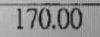

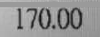

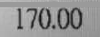

In [8]:
# left 不为-1的拼接，特殊符号去空格，单词之间空格连接
# 直线检测

import cv2 as cv
import numpy as np


def line_detect_possible(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(gray, 50, 100, apertureSize = 3)
    # minLineLength - 线段的最小长度. Line segments shorter than this are rejected.
    # maxLineGap - 使程序识别线段为一条线的线段之间最大的空隙
    lines = cv.HoughLinesP(edges, 1, np.pi/180, 50, 100, minLineLength = 50, maxLineGap = 1)
    if lines is None:
        return 
    
    h, w, _ = image.shape
    
    # 填充颜色计算
    arr = image.flatten()
    arr = [i for i in arr if i >= 80] # 灰度大于80的才计算（太黑的就是字体颜色了）
    gray = sum(arr) / max(len(arr), 1) # 避免除0报错
    
    for line in lines:
        x1, y1, x2, y2 = line[0] 
        # 只处理水平线，避免识别错误线段必须大于长度的三分一以上
        if (y2 - y1) > (x2 - x1) or (x2 - x1) < w/3:
            continue
        
        # 画线条
        #cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        # 整条水平线都画颜色
        cv.line(image, (0, y1), (w, y2), (gray, gray, gray), 2)
    
    img = Image.fromarray(image)
    display(img)
    return img

src = cv.imread("./images/17_.png")
display(Image.fromarray(src))
line_detect_possible(src)

src = cv.imread("./images/27_.png")
display(Image.fromarray(src))
line_detect_possible(src)

# 只处理水平干扰线（需要判断是否为水平）
# 占长度的60%以上 才算干扰线
# 高斯填充

In [ ]:
for p in paths:
    src = cv.imread(p)
    
    display(Image.fromarray(src))
    df1 = pytesseract.image_to_data(src, output_type=pytesseract.Output.DATAFRAME, config='-l eng --oem 3 --psm 7 -c load_system_dawg=0 -c load_freq_dawg=0')
    print(df1[df1.conf>0][['conf', 'text']])
    
    image = line_detect_possible(src)
    
    if image is not None:
        print(p)
        df = pytesseract.image_to_data(image, output_type=pytesseract.Output.DATAFRAME, config='-l eng --oem 3 --psm 7 -c load_system_dawg=0 -c load_freq_dawg=0')
        print(df[df.conf>0][['conf', 'text']])